In [ ]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import itertools
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### **Loading the dataset**

In [ ]:
# Loading the tweets into a dataframe

climateDF = pd.read_csv('/content/climate-tweets.csv')

climateDF.head()

,tweetid,tweets
0,7.931500e+17,A remarkable man and his work on climate chang...
1,7.931503e+17,"RT @NYTnickc: Trump, who once called climate c..."
2,7.931506e+17,RT @NatGeoPhotos: Here's what happens when an ...
3,7.931510e+17,RT @NatGeoChannel: Watch #BeforeTheFlood right...
4,7.931512e+17,RT @ABCPolitics: .@realDonaldTrump vows to can...


### **Cleaning and Tokenization**

In [ ]:
# Removing unwanted elements (punctuations, whitespace, usernames, URLs, Hashtags etc.)
def clean_text(d):
    d = d.lower()

    to_del = [
        r"@[\w]*",
        r"http(s?):\/\/.*\/\w*",
        r"#\w*",
        r"\d+",
        r"U+FFFD",]

    for key in to_del:
        d = re.sub(key, "", d)

    d = re.sub(r"[,.;':@#?!\&/$]+\ *", " ", d)
    d = re.sub(r"\s\s+", " ", d)

    return d.lstrip(" ")


# Removing stopwords
def clean_stopword(d):
    stop_words = stopwords.words('english')
    return " ".join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w) > 1])


# Tokenizing the tweets

def tokenize(d):
    return word_tokenize(d)

# def tokenize(d):
#     tokens = word_tokenize(d)
#     return " ".join(tokens)

In [ ]:
# Applying the functions
climateDF['tokenized_tweets']= climateDF.tweets.apply(clean_text)\
                          .apply(clean_stopword).apply(tokenize)

climateDF.head()

,tweetid,tweets,tokenized_tweets
0,7.931500e+17,A remarkable man and his work on climate chang...,"[remarkable, man, work, climate, change, impre..."
1,7.931503e+17,"RT @NYTnickc: Trump, who once called climate c...","[rt, trump, called, climate, change, hoax, chi..."
2,7.931506e+17,RT @NatGeoPhotos: Here's what happens when an ...,"[rt, happens, astronaut, actor, start, convers..."
3,7.931510e+17,RT @NatGeoChannel: Watch #BeforeTheFlood right...,"[rt, watch, right, travels, world, tackle, cli..."
4,7.931512e+17,RT @ABCPolitics: .@realDonaldTrump vows to can...,"[rt, vows, cancel, billions, climate, change, ..."


### **Sentiment Analysis**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initializing VADER
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Defining a function to calculate polarity scores
def get_sentiment_score(tweet):
    sentiment = sia.polarity_scores(tweet)
    return sentiment['compound']

# Initializing the function
climateDF['sentiment_score']= climateDF['tweets'].apply(get_sentiment_score)

In [ ]:
climateDF.head()

,tweetid,tweets,tokenized_tweets,sentiment_score
0,7.931500e+17,A remarkable man and his work on climate chang...,"[remarkable, man, work, climate, change, impre...",0.8334
1,7.931503e+17,"RT @NYTnickc: Trump, who once called climate c...","[rt, trump, called, climate, change, hoax, chi...",-0.2732
2,7.931506e+17,RT @NatGeoPhotos: Here's what happens when an ...,"[rt, happens, astronaut, actor, start, convers...",0.0000
3,7.931510e+17,RT @NatGeoChannel: Watch #BeforeTheFlood right...,"[rt, watch, right, travels, world, tackle, cli...",0.0000
4,7.931512e+17,RT @ABCPolitics: .@realDonaldTrump vows to can...,"[rt, vows, cancel, billions, climate, change, ...",-0.2500


In [ ]:
# Creating the sentiment labels

threshold = 0.05

climateDF['sentiment'] = [
    1 if compound >= threshold else (
    -1 if compound <= -threshold else 0)
    for compound in climateDF['sentiment_score']]

climateDF.head()

,tweetid,tweets,tokenized_tweets,sentiment_score,sentiment
0,7.931500e+17,A remarkable man and his work on climate chang...,"[remarkable, man, work, climate, change, impre...",0.8334,1
1,7.931503e+17,"RT @NYTnickc: Trump, who once called climate c...","[rt, trump, called, climate, change, hoax, chi...",-0.2732,-1
2,7.931506e+17,RT @NatGeoPhotos: Here's what happens when an ...,"[rt, happens, astronaut, actor, start, convers...",0.0000,0
3,7.931510e+17,RT @NatGeoChannel: Watch #BeforeTheFlood right...,"[rt, watch, right, travels, world, tackle, cli...",0.0000,0
4,7.931512e+17,RT @ABCPolitics: .@realDonaldTrump vows to can...,"[rt, vows, cancel, billions, climate, change, ...",-0.2500,-1


In [ ]:
climateDF.describe()

,tweetid,sentiment_score,sentiment
count,4.375900e+04,43759.000000,43759.000000
mean,8.369912e+17,-0.026703,-0.014031
std,8.581228e+16,0.393019,0.860956
min,5.926334e+17,-0.974000,-1.000000
25%,7.971323e+17,-0.340000,-1.000000
50%,8.402804e+17,0.000000,0.000000
75%,9.022856e+17,0.223500,1.000000
max,9.667024e+17,0.952800,1.000000


In [ ]:
climateDF['sentiment'].describe()

count    43759.000000
mean        -0.014031
std          0.860956
min         -1.000000
25%         -1.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: sentiment, dtype: float64

### **Data Preprocessing**

In [ ]:
# Conducting feature extraction

X = climateDF[['tweets', 'tweetid', 'sentiment_score']]
y = climateDF['sentiment']

### **Exploratory Data Analysis**

In [ ]:
# Checking for the unique values in the dataset

climateDF.sentiment.value_counts()

-1    16529
 1    15915
 0    11315
Name: sentiment, dtype: int64

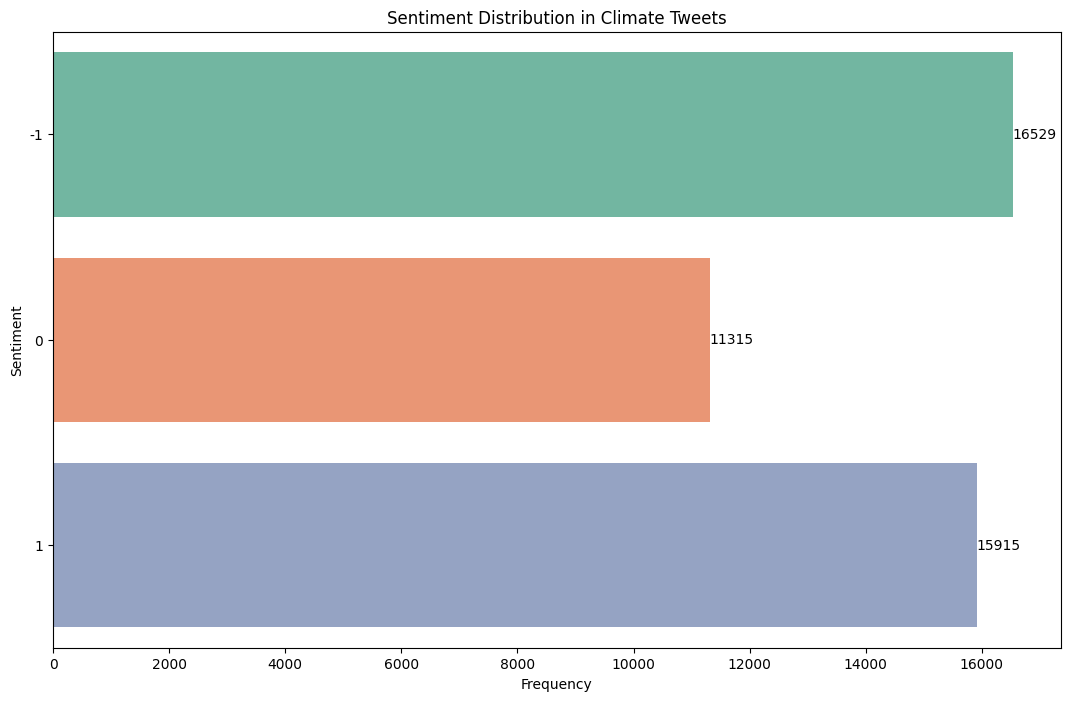

In [ ]:
# Visualizing the sentiment distribution

plt.figure(figsize=(13, 8))
count_plot = sns.countplot(data=climateDF, y='sentiment', palette='Set2')
count_plot.bar_label(count_plot.containers[0], fmt='%d')

plt.title('Sentiment Distribution in Climate Tweets')
plt.xlabel('Frequency')
plt.ylabel('Sentiment')
plt.show()

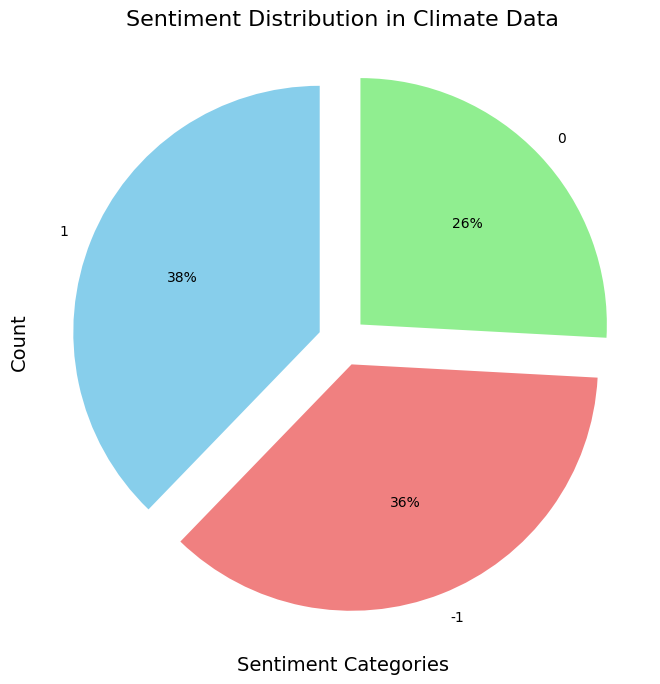

In [ ]:
# Plotting a pie chart

plt.figure(figsize=(8, 8))

labels = climateDF.sentiment.unique()
sentiment_counts = climateDF["sentiment"].value_counts()
colors = ['skyblue', 'lightcoral', 'lightgreen']

plt.pie(sentiment_counts,
        labels=labels,
        autopct="%1.0f%%",
        startangle=90,
        explode=tuple([0.1] * len(labels)),
        colors=colors)

plt.title('Sentiment Distribution in Climate Data', fontsize=16)
plt.xlabel('Sentiment Categories', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()


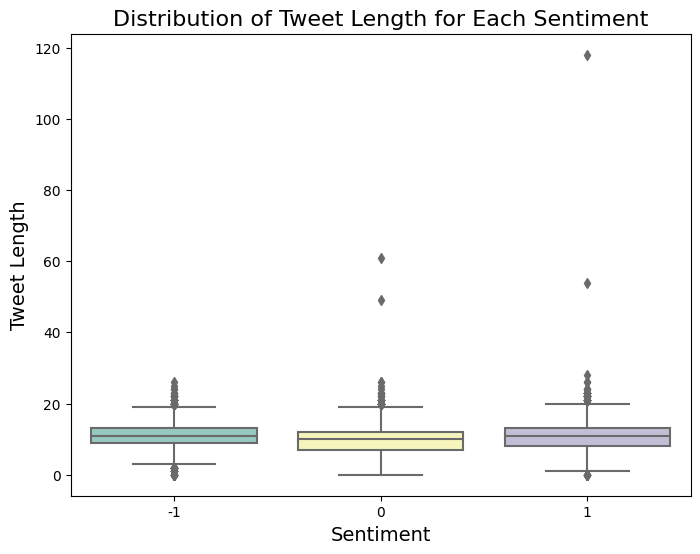

In [ ]:
plt.figure(figsize=(8, 6))

sns.boxplot(x="sentiment", y=climateDF["tokenized_tweets"].str.len(), data=climateDF, palette="Set3")

plt.title("Distribution of Tweet Length for Each Sentiment", fontsize=16)
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Tweet Length", fontsize=14)

plt.show()


#### **Developing WordClouds**

In [ ]:
from wordcloud import WordCloud

In [ ]:
# Extract the buzzwords from each class

pro = climateDF[climateDF.sentiment == 1].tweets.apply(clean_text).apply(clean_stopword)
pro = " ".join(pro)

anti = climateDF[climateDF.sentiment == -1].tweets.apply(clean_text).apply(clean_stopword)
anti = " ".join(anti)

neutral = climateDF[climateDF.sentiment == 0].tweets.apply(clean_text).apply(clean_stopword)
neutral = " ".join(neutral)

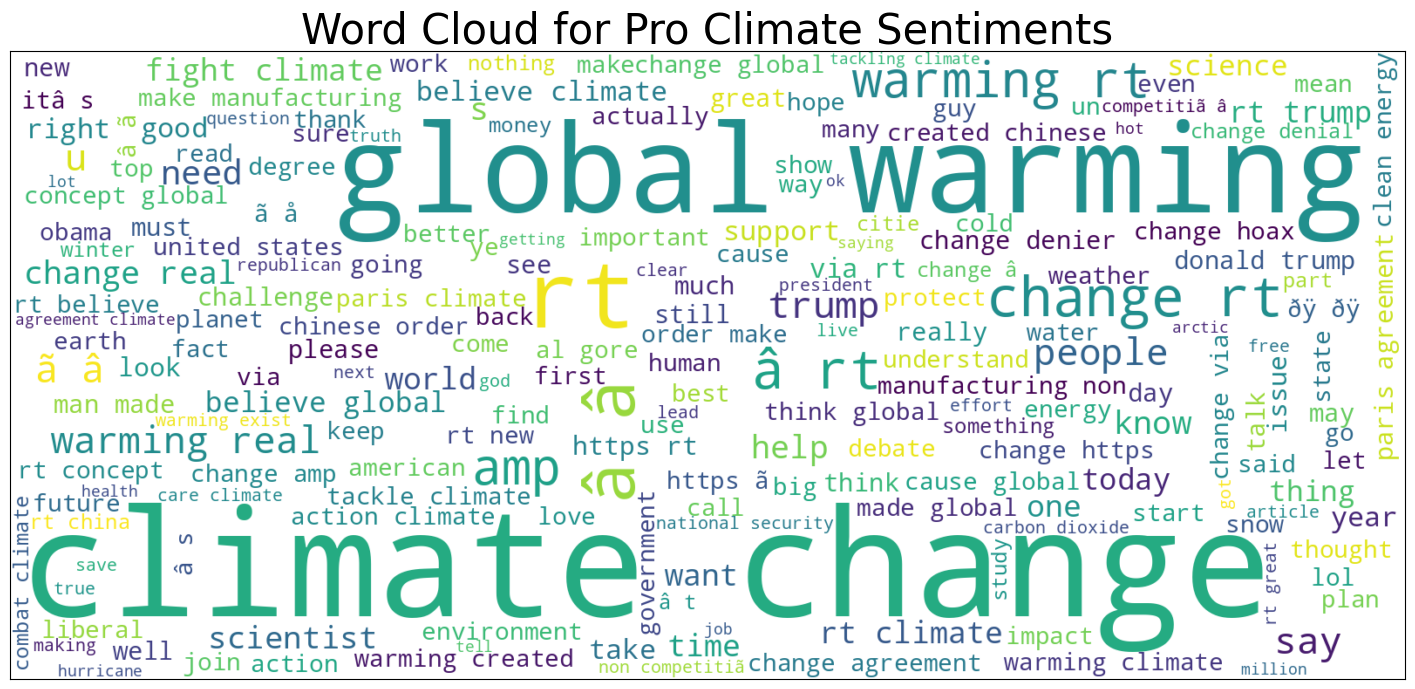

In [ ]:
from IPython.display import display

plt.figure(figsize=(18, 15))

wordcloudPro = WordCloud(min_font_size=3, max_words=200, width=1600, height=720,
                   colormap='viridis', background_color='white').generate(pro)

plt.imshow(wordcloudPro, interpolation='bilinear')
plt.title('Word Cloud for Pro Climate Sentiments', fontsize=30)
plt.xticks([])
plt.yticks([])
plt.grid(False)

plt.show()


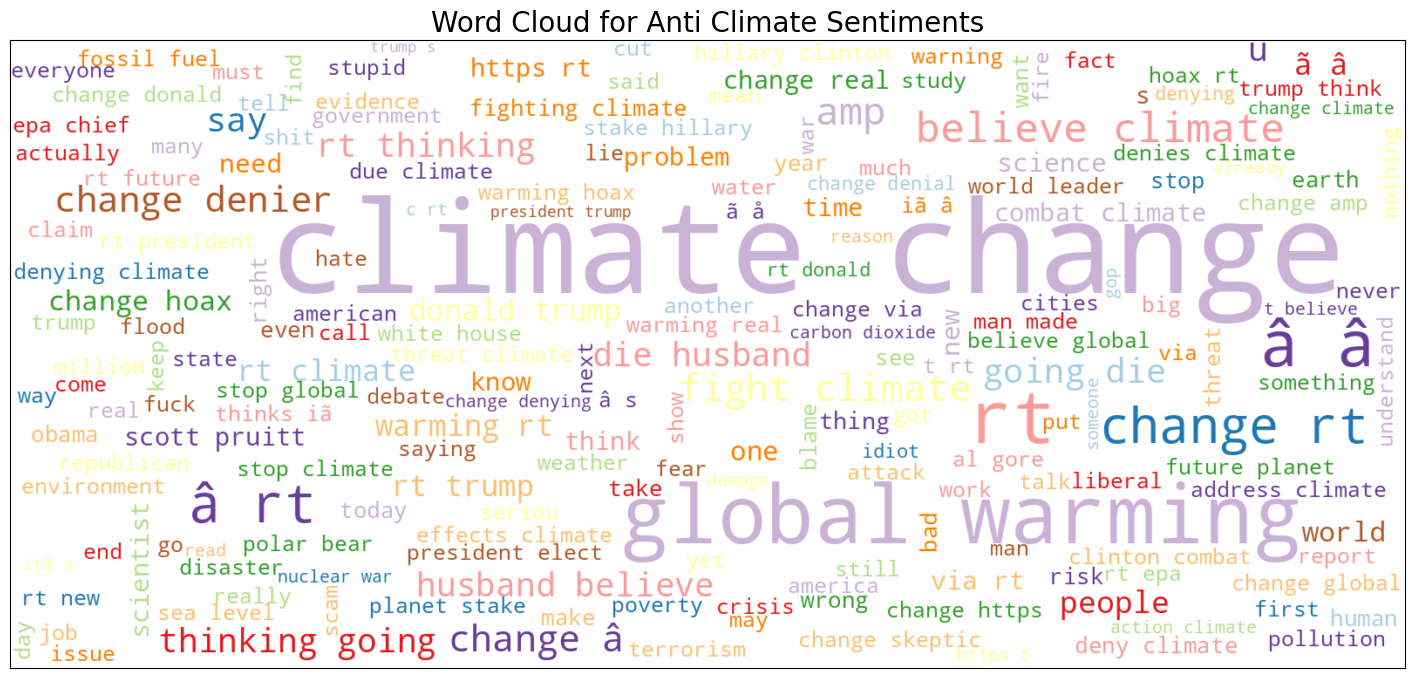

In [ ]:

plt.figure(figsize=(18, 15))

wordcloudAnti = WordCloud(min_font_size=3, max_words=200, width=1600, height=720,
                    colormap='Paired', background_color='white').generate(anti)

plt.imshow(wordcloudAnti, interpolation='bilinear')
plt.title('Word Cloud for Anti Climate Sentiments', fontsize=20)
plt.xticks([])
plt.yticks([])
plt.grid(False)

plt.show()

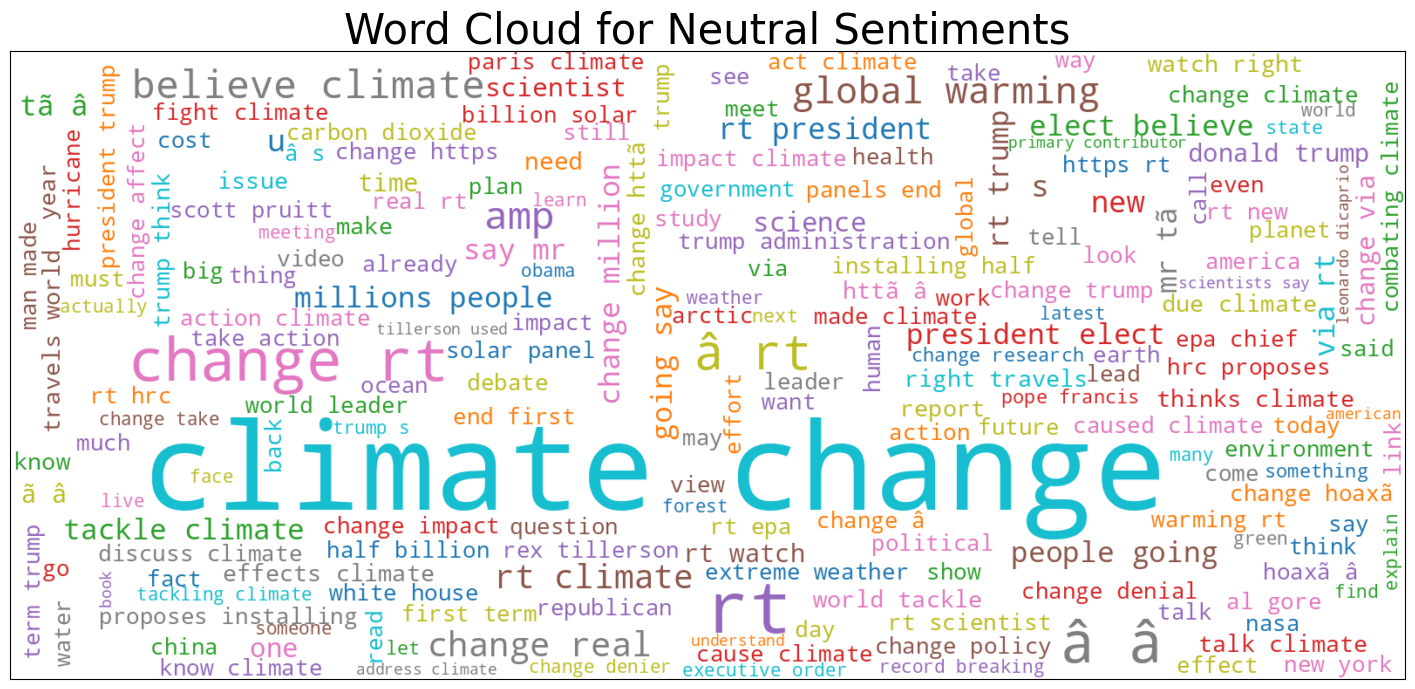

In [ ]:
plt.figure(figsize=(18, 15))

wordcloudNeutral = WordCloud(min_font_size=3, max_words=200, width=1600, height=720,
                               colormap='tab10', background_color='white').generate(neutral)

plt.imshow(wordcloudNeutral, interpolation='bilinear')
plt.title('Word Cloud for Neutral Sentiments', fontsize=30)
plt.xticks([])
plt.yticks([])
plt.grid(False)

plt.show()


In [ ]:
# Creating a frequency distribution of top 20 words

top20 = {}

for sentiment, group in climateDF.groupby("sentiment"):
    freq_words = group["tweets"].apply(lambda tweet: re.findall(r"#(\w+)", tweet))
    freq_words = itertools.chain(*freq_words)
    freq_words = [ht.lower() for ht in freq_words]

    frequency = nltk.FreqDist(freq_words)

    df_freq_words = pd.DataFrame({
        "freq_words": list(frequency.keys()),
        "counts": list(frequency.values()),
    })
    top20_htags = df_freq_words.nlargest(20, columns=["counts"])

    top20[sentiment] = top20_htags.reset_index(drop=True)

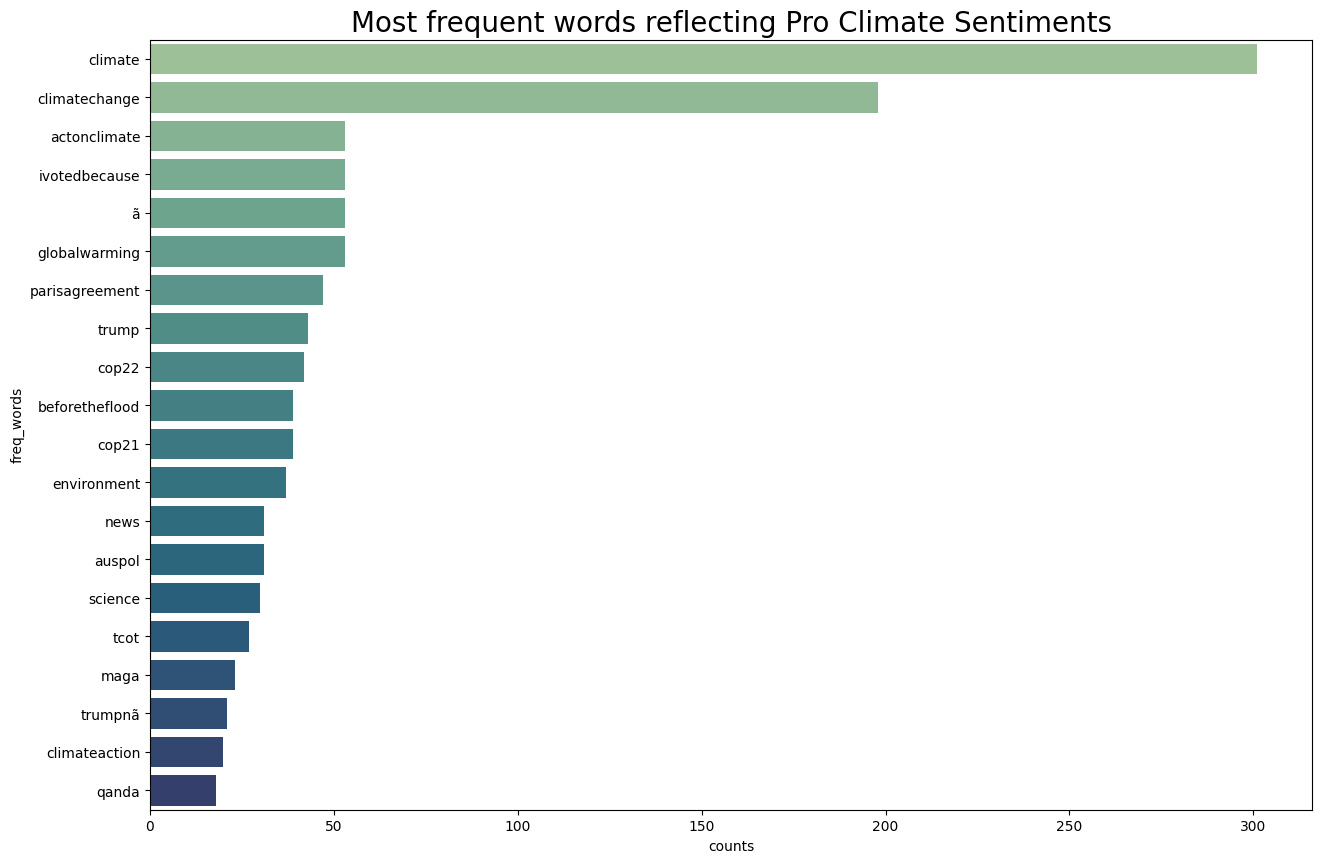

In [ ]:
# Visualizing the frequency distribution

pro_climate_data = top20[1]

plt.figure(figsize=(15, 10))
sns.barplot(data=pro_climate_data,
            y="freq_words",
            x="counts",
            palette='crest')
plt.title("Most frequent words reflecting Pro Climate Sentiments", fontsize=20)
plt.show()


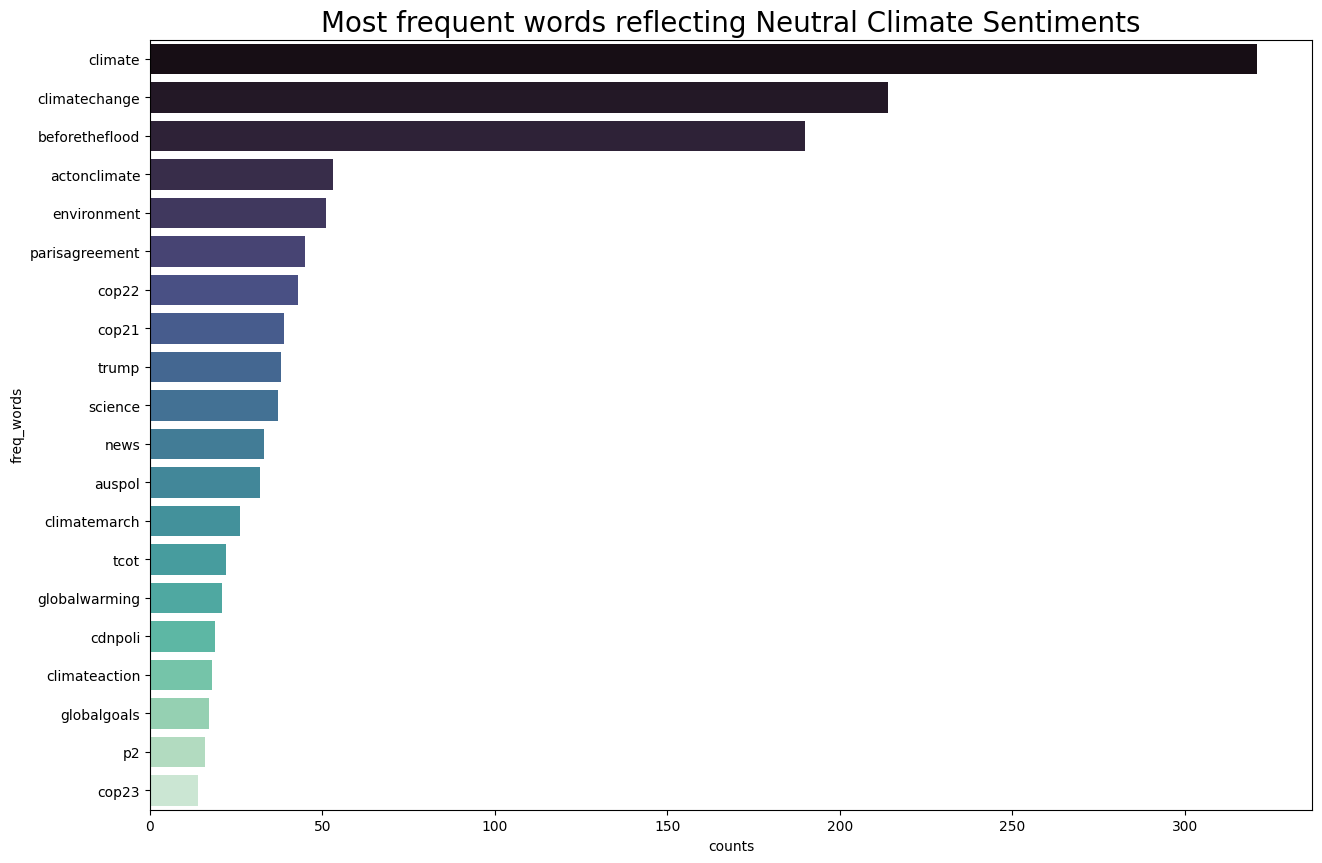

In [ ]:
neutral_climate_data = top20[0]

plt.figure(figsize=(15, 10))
sns.barplot(data=neutral_climate_data,
            y="freq_words",
            x="counts",
            palette='mako')
plt.title("Most frequent words reflecting Neutral Climate Sentiments", fontsize=20)
plt.show()


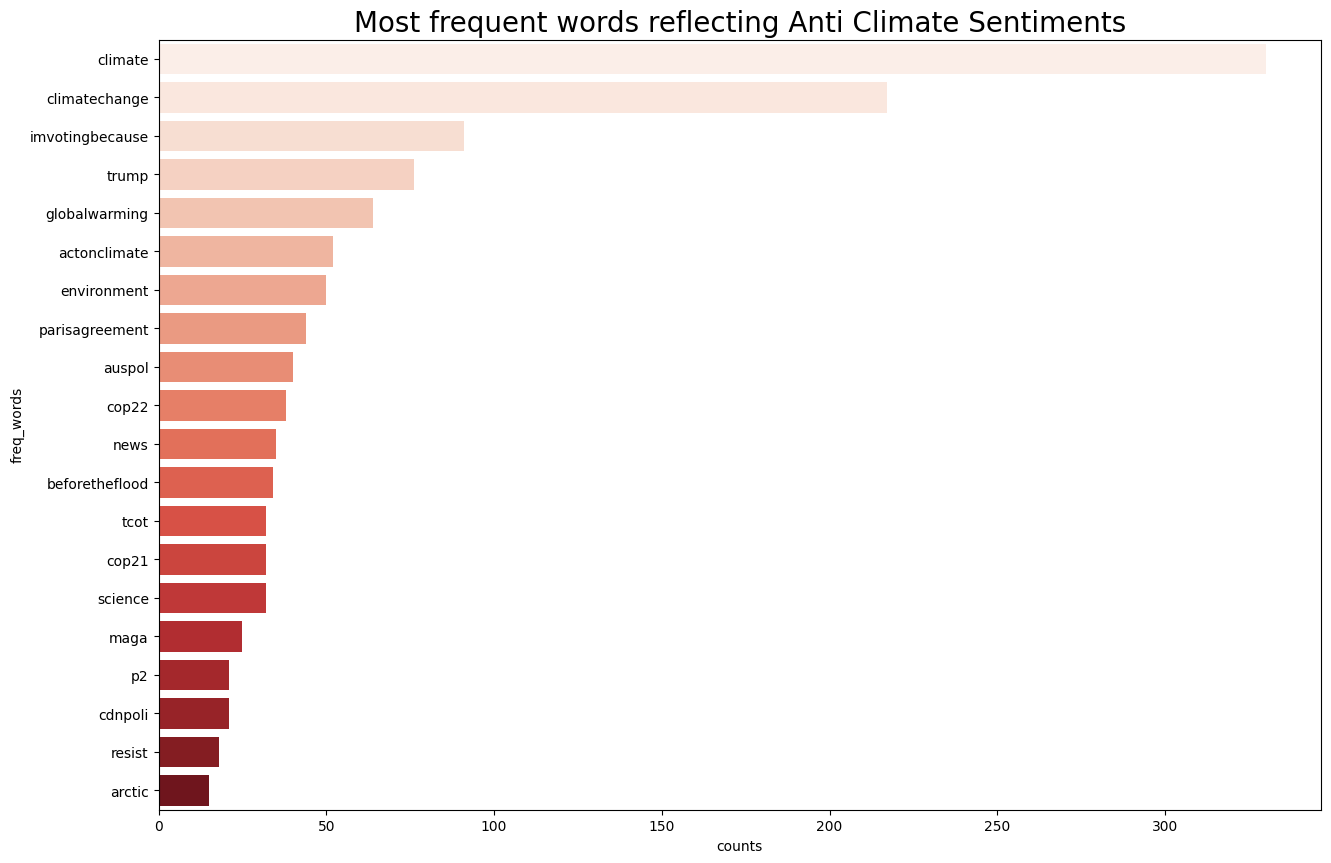

In [ ]:
anti_climate_data = top20[-1]

plt.figure(figsize=(15, 10))
sns.barplot(data=anti_climate_data,
            y="freq_words",
            x="counts",
            palette='Reds')
plt.title("Most frequent words reflecting Anti Climate Sentiments", fontsize=20)
plt.show()


### **Model Development**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [ ]:
# Splitting the dataset

X = climateDF["tweets"]
y = climateDF["sentiment"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Transform the tweets into a matrix for analysis

tfidf = TfidfVectorizer()
tfidf.fit_transform(X_train)

<35007x63382 sparse matrix of type '<class 'numpy.float64'>'
	with 609940 stored elements in Compressed Sparse Row format>

In [ ]:
# Creating a list of sentiment classes

sentiment_classes = sorted(['-1', '1', '0'])

**Logistic Regression Model**

In [ ]:
# Initializing the Logistic Regression model
logModel = LogisticRegression(class_weight="balanced", max_iter=1000)

# Training the Logistic Regression model
logModel.fit(tfidf.transform(X_train), Y_train)

# Making predictions on the test set
logPred = logModel.predict(tfidf.transform(X_test))


Accuracy Score: 78.70%
Classification Report:
              precision    recall  f1-score   support

          -1       0.84      0.75      0.79      3337
           0       0.71      0.85      0.77      2292
           1       0.81      0.77      0.79      3123

    accuracy                           0.79      8752
   macro avg       0.79      0.79      0.79      8752
weighted avg       0.79      0.79      0.79      8752



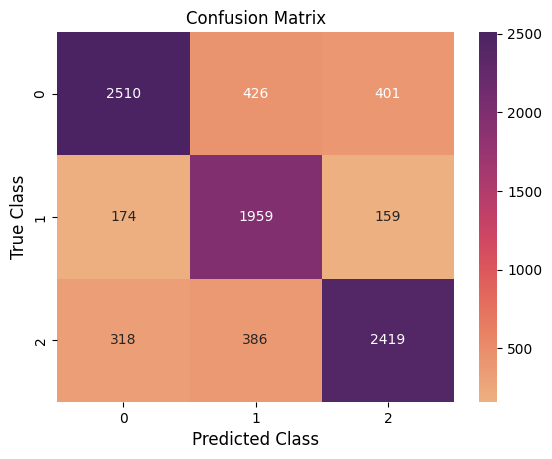

In [ ]:
# Generating the confusion matrix heatmap

print(f"Accuracy Score: {accuracy_score(Y_test,logPred)*100:.2f}%")

# Generating the classification report
print("Classification Report:")
print(classification_report(Y_test,logPred))

cm = confusion_matrix(Y_test,logPred)
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12),
xticklabels = sentiment_classes,
yticklabels = sentiment_classes,
plt.show()


**Random Forest**

In [ ]:
# Initializing the Random Forest model
rfModel = RandomForestClassifier(n_estimators=100, criterion = 'gini', max_features = 'log2')

# Fitting the model on the training data
rfModel.fit(tfidf.transform(X_train), Y_train)

# Running predictions on the test set
rfPred = rfModel.predict(tfidf.transform(X_test))


Accuracy Score: 73.50%
Classification Report:
              precision    recall  f1-score   support

          -1       0.74      0.73      0.73      3337
           0       0.71      0.73      0.72      2292
           1       0.75      0.75      0.75      3123

    accuracy                           0.74      8752
   macro avg       0.73      0.74      0.73      8752
weighted avg       0.74      0.74      0.74      8752



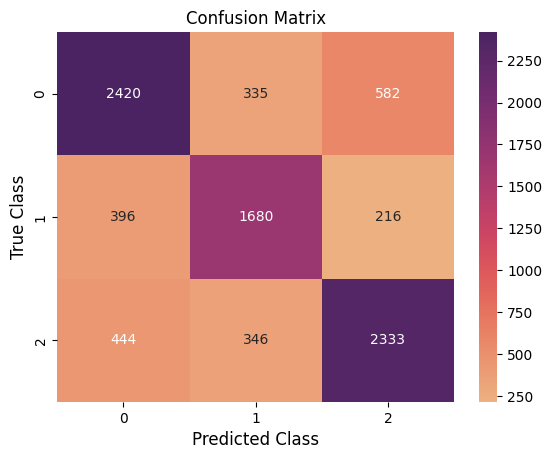

In [ ]:
# Generating the confusion matrix heatmap

print(f"Accuracy Score: {accuracy_score(Y_test,rfPred)*100:.2f}%")

# Generating the classification report
print("Classification Report:")
print(classification_report(Y_test,rfPred))

cm = confusion_matrix(Y_test,rfPred)
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12),
xticklabels = sentiment_classes,
yticklabels = sentiment_classes,
plt.show()